### **AQI model using Linear Regression**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-4-08a2214ff9d9>:10: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_station_hour = pd.read_csv("/content/drive/My Drive/AQI/station_hour.csv")


Training MSE: 4.917470620415515
Validation MSE: 4.888336864089262


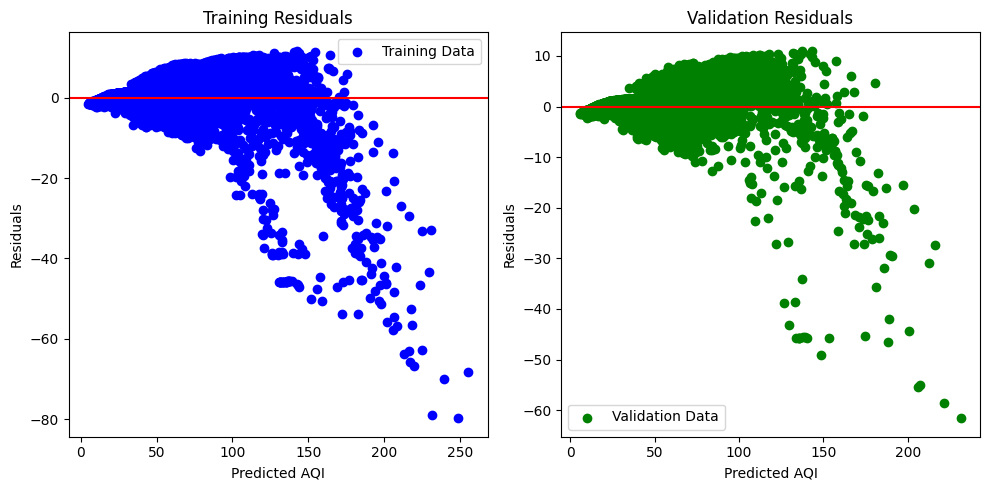

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt

# Load data from CSV files
df_station_hour = pd.read_csv("/content/drive/My Drive/AQI/station_hour.csv")
stations = pd.read_csv("/content/drive/My Drive/AQI/stations.csv")

# Merge station data with AQI data
df_station_hour = df_station_hour.merge(stations[['StationId']], on="StationId")

# Define AQI calculation formulas
# Simplified version for AQI calculation (average of all pollutants)
def calculate_AQI(row):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NOx', 'NH3', 'CO', 'O3']
    sub_indices = [get_subindex(row[poll]) for poll in pollutants]
    return sum(sub_indices) / len(sub_indices)

# Define sub-index calculation function
def get_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return 50 + (x - 50) / 50 * 50
    elif x <= 200:
        return 100 + (x - 100) / 100 * 50
    elif x <= 300:
        return 200 + (x - 200) / 100 * 100
    elif x <= 400:
        return 300 + (x - 300) / 100 * 100
    else:
        return 400 + (x - 400) / 500 * 100

# Apply AQI calculation to station hour data
df_station_hour["AQI_calculated"] = df_station_hour.apply(calculate_AQI, axis=1)

# Drop rows with missing values
df_station_hour.dropna(inplace=True)

# Select features and target
X = df_station_hour[['PM2.5', 'PM10', 'SO2', 'NOx', 'NH3', 'CO', 'O3']]
y = df_station_hour['AQI_calculated']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Define and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)

# Save the model
joblib.dump(model, 'linear_regression_model.pkl')

# Plot residuals
train_residuals = y_train - y_train_pred
val_residuals = y_val - y_val_pred

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, color='blue', label='Training Data')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.title('Training Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_val_pred, val_residuals, color='green', label='Validation Data')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.title('Validation Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()

plt.tight_layout()
plt.show()


# **Random** **Forest** ✅

<ipython-input-1-653bdd2bfc3c>:10: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_station_hour = pd.read_csv("/content/drive/My Drive/AQI/station_hour.csv")


Training MSE: 0.1726189381709625
Validation MSE: 1.1364283670545254
Training R^2: 0.9995379443304514
Validation R^2: 0.9970140904666176


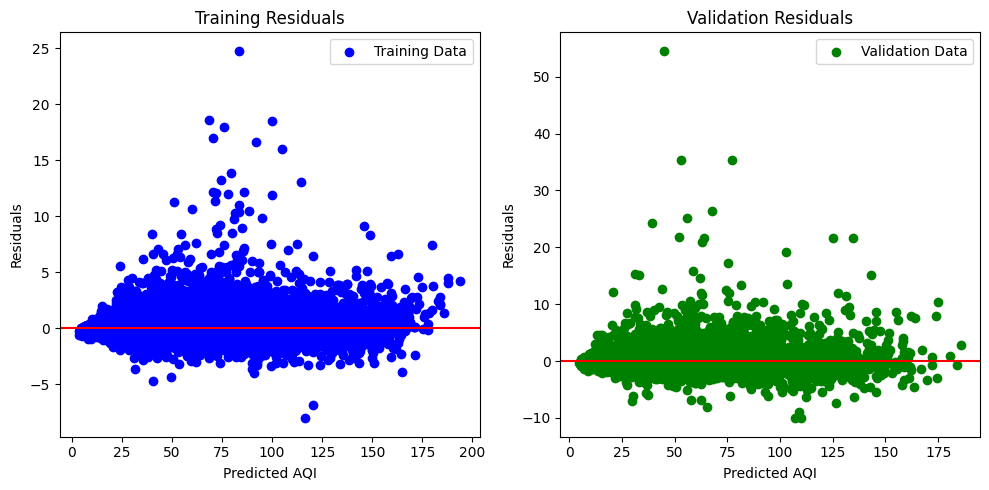

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Load data from CSV files
df_station_hour = pd.read_csv("/content/drive/My Drive/AQI/station_hour.csv")
stations = pd.read_csv("/content/drive/My Drive/AQI/stations.csv")

# Merge station data with AQI data
df_station_hour = df_station_hour.merge(stations[['StationId']], on="StationId")

# Define AQI calculation formulas
# Simplified version for AQI calculation (average of all pollutants)
def calculate_AQI(row):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NOx', 'NH3', 'CO', 'O3']
    sub_indices = [get_subindex(row[poll]) for poll in pollutants]
    return sum(sub_indices) / len(sub_indices)

# Define sub-index calculation function
def get_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return 50 + (x - 50) / 50 * 50
    elif x <= 200:
        return 100 + (x - 100) / 100 * 50
    elif x <= 300:
        return 200 + (x - 200) / 100 * 100
    elif x <= 400:
        return 300 + (x - 300) / 100 * 100
    else:
        return 400 + (x - 400) / 500 * 100

# Apply AQI calculation to station hour data
df_station_hour["AQI_calculated"] = df_station_hour.apply(calculate_AQI, axis=1)

# Drop rows with missing values
df_station_hour.dropna(inplace=True)

# Select features and target
X = df_station_hour[['PM2.5', 'PM10', 'SO2', 'NOx', 'NH3', 'CO', 'O3']]
y = df_station_hour['AQI_calculated']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Training R^2:", train_r2)
print("Validation R^2:", val_r2)

# Save the model
joblib.dump(model, 'random_forest_model.pkl')

# Plot residuals
train_residuals = y_train - y_train_pred
val_residuals = y_val - y_val_pred

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, color='blue', label='Training Data')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.title('Training Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_val_pred, val_residuals, color='green', label='Validation Data')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.title('Validation Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-1-2e96a96c1939>:11: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_station_hour = pd.read_csv("/content/drive/My Drive/AQI/station_hour.csv")


Training MSE: 0.1726189381709625
Validation MSE: 1.1364283670545254
Training R^2: 0.9995379443304514
Validation R^2: 0.9970140904666176
Training RMSE: 0.41547435320481874
Validation RMSE: 1.0660339427309646


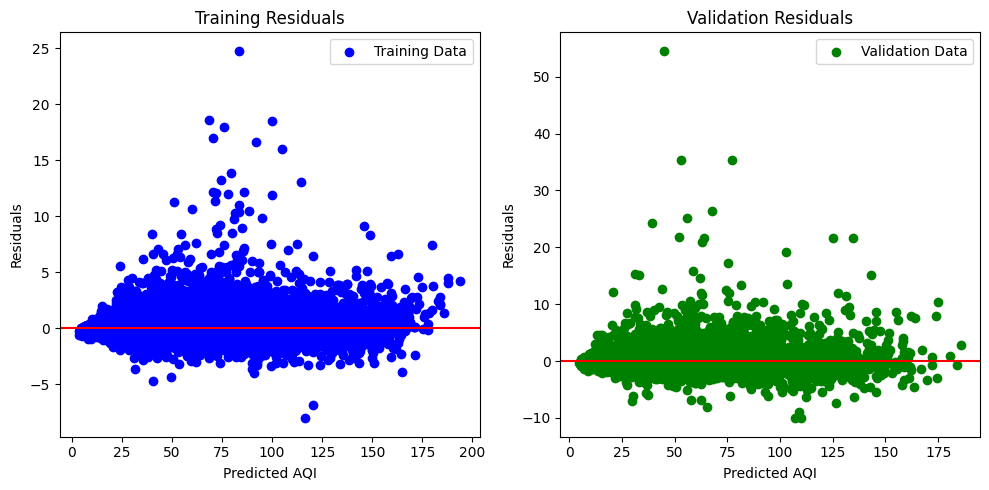

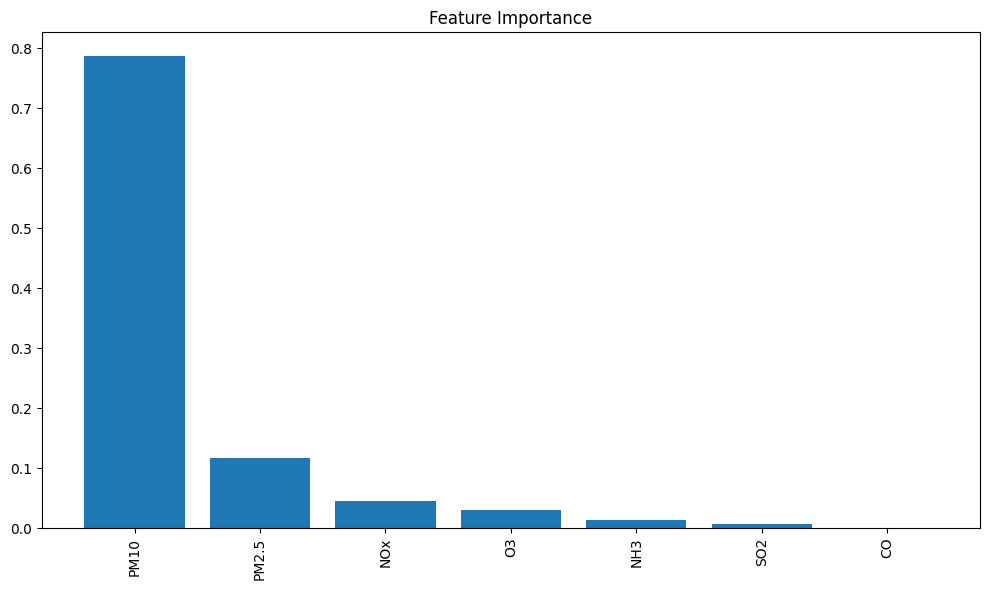

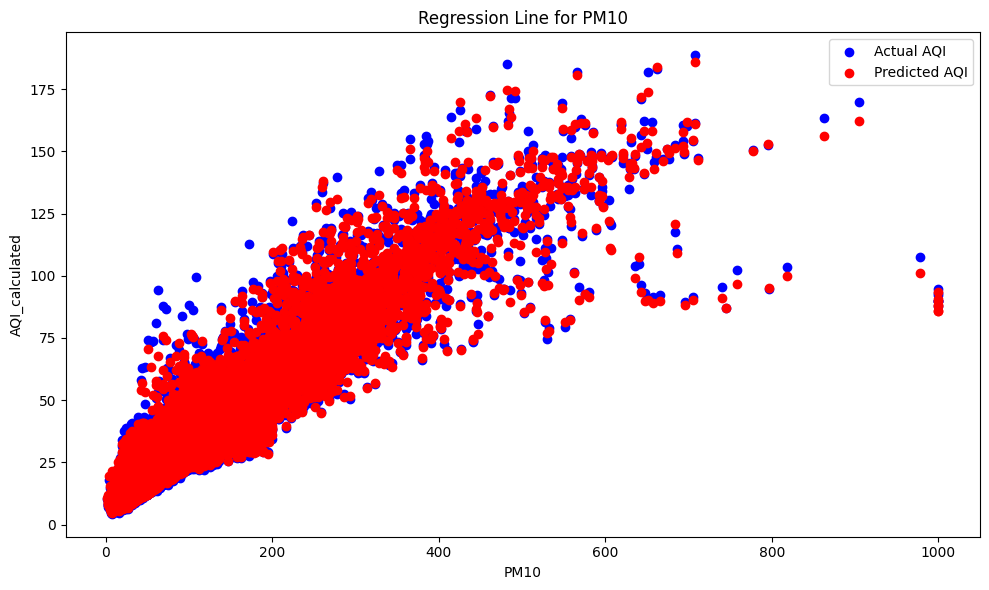

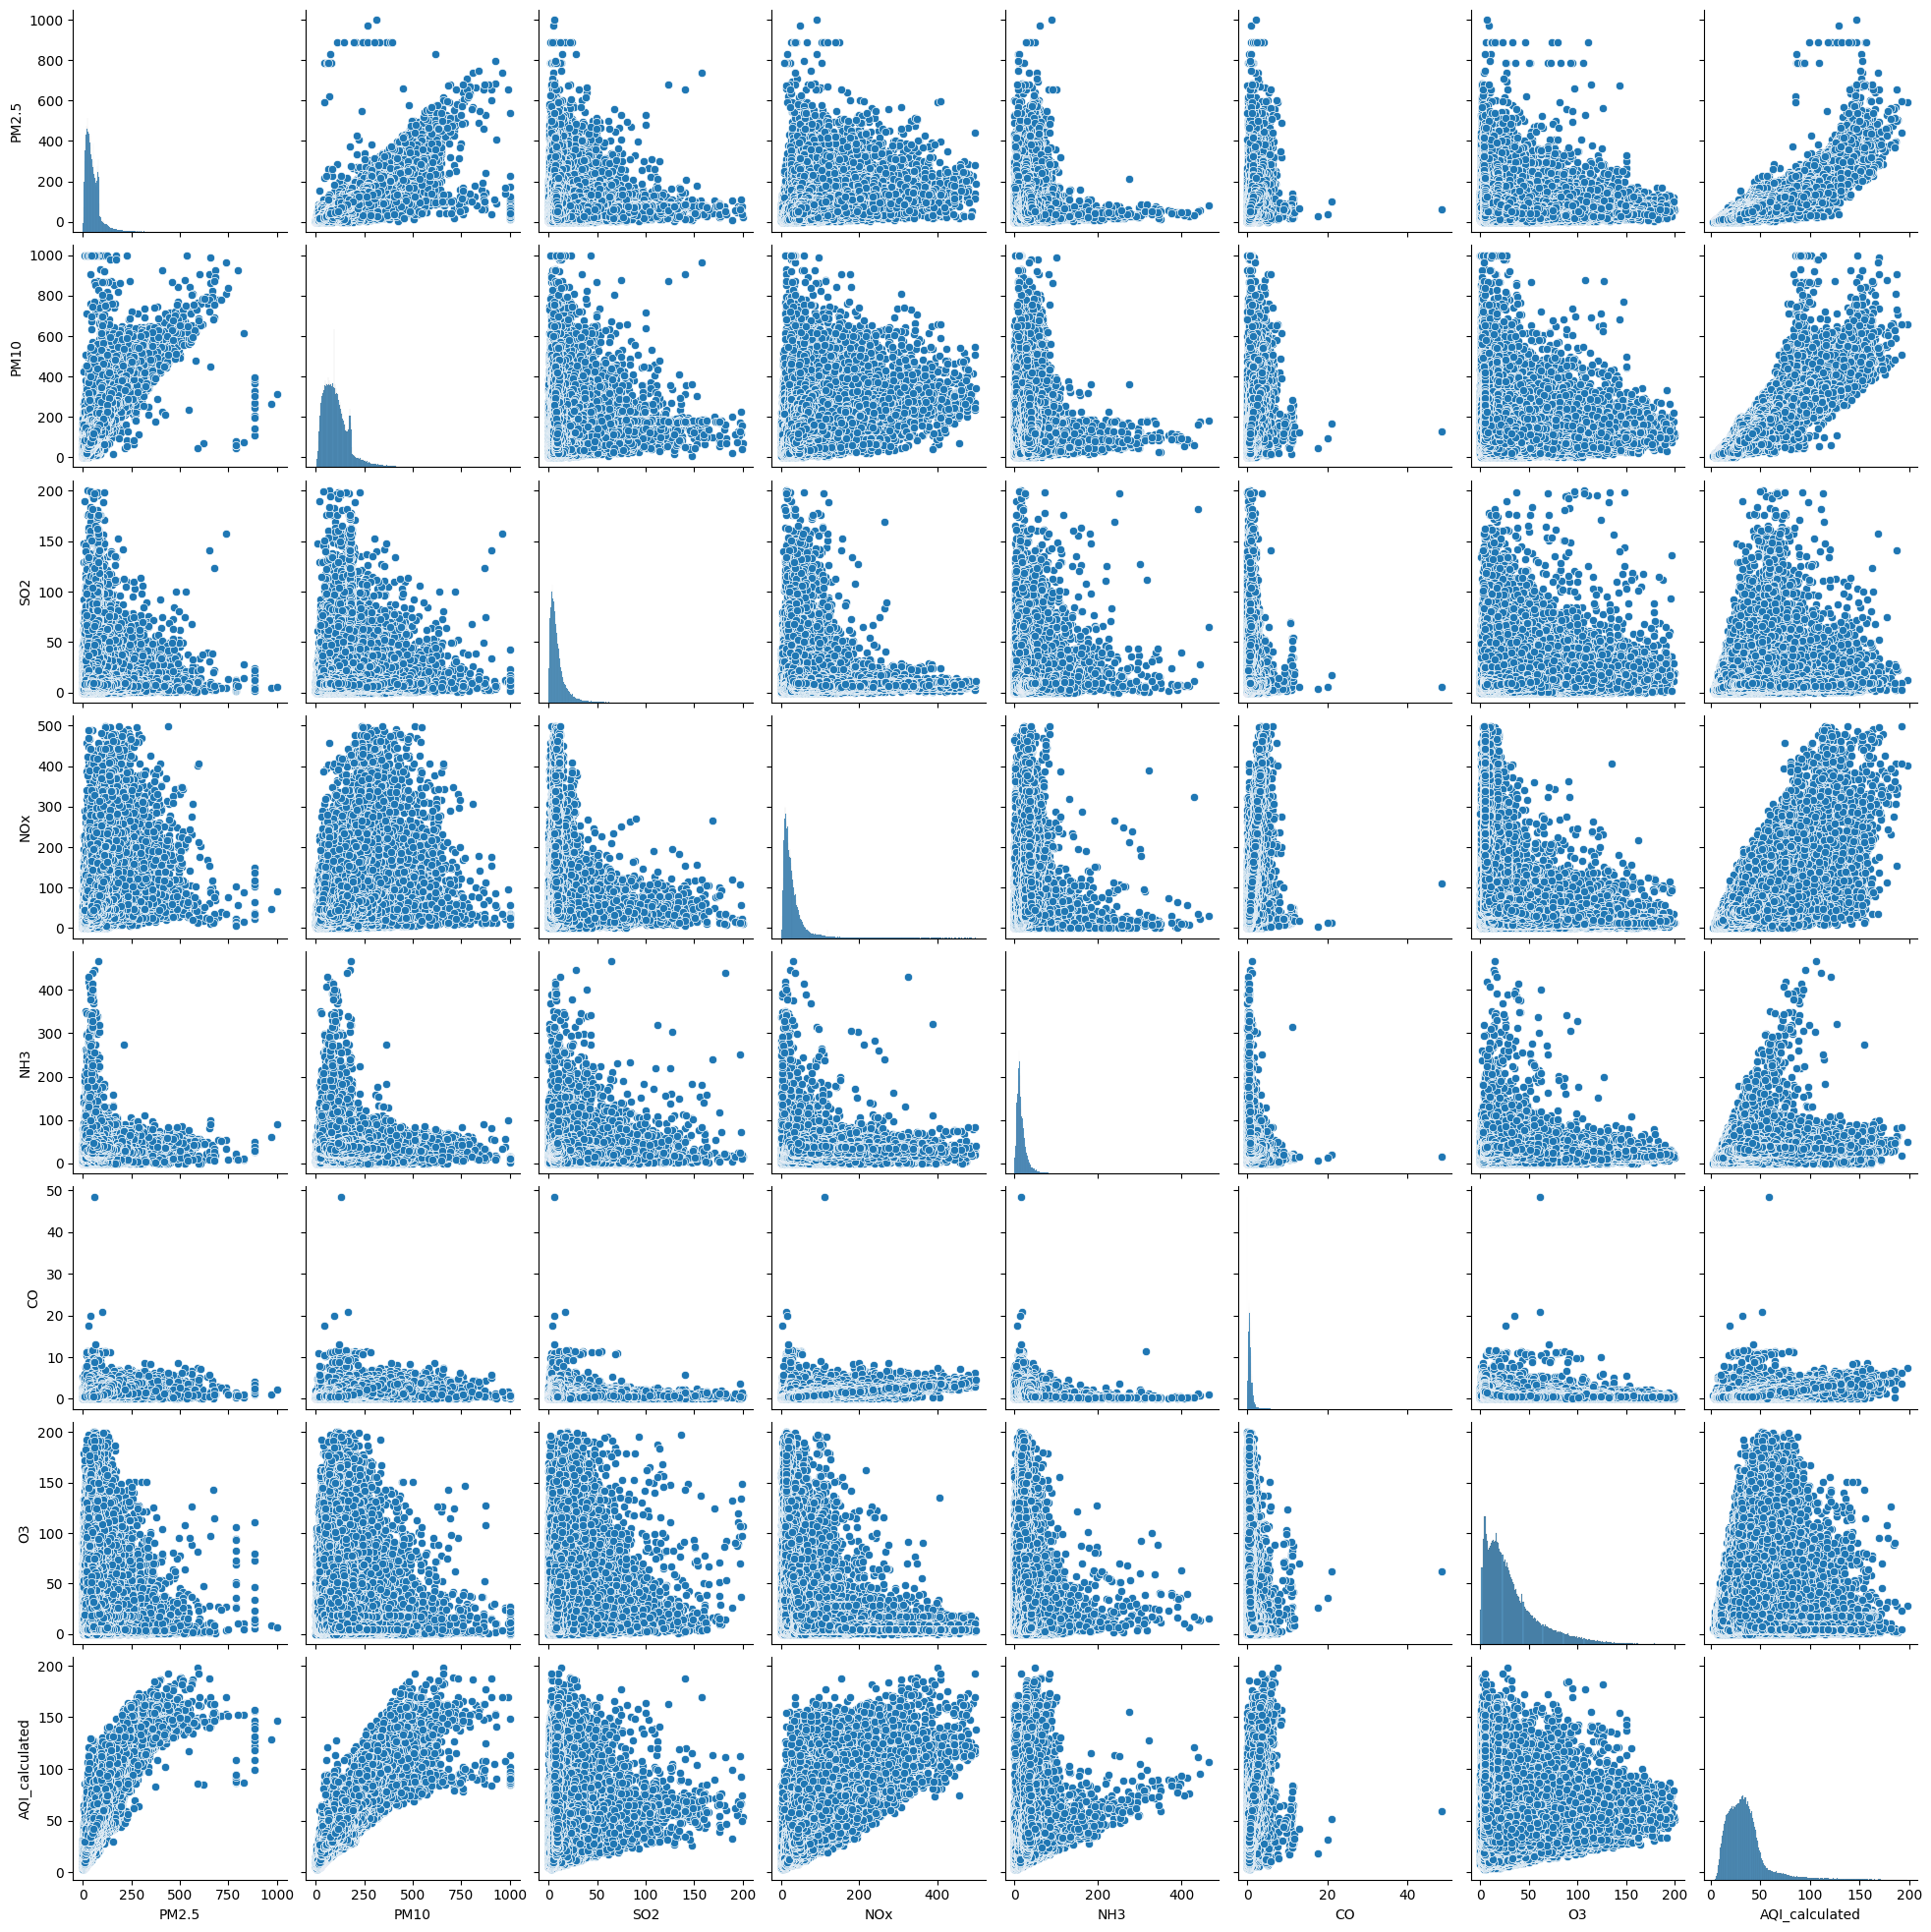

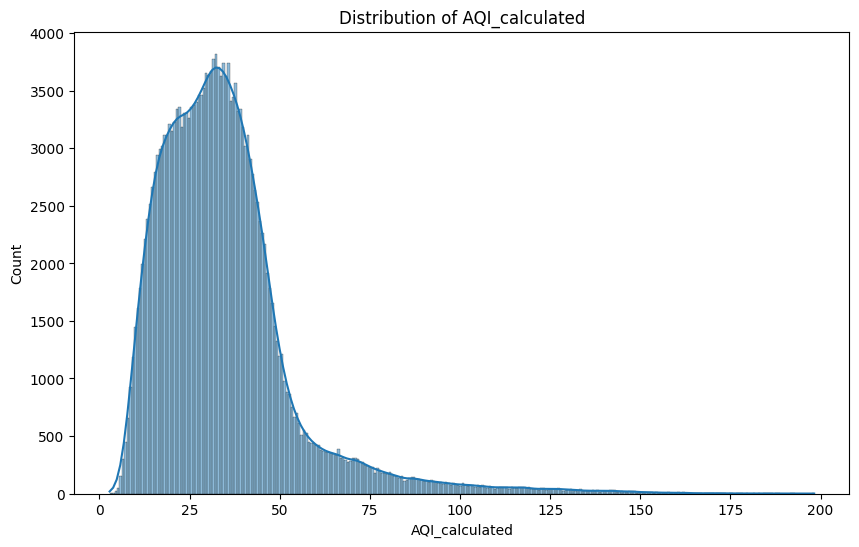

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV files
df_station_hour = pd.read_csv("/content/drive/My Drive/AQI/station_hour.csv")
stations = pd.read_csv("/content/drive/My Drive/AQI/stations.csv")

# Merge station data with AQI data
df_station_hour = df_station_hour.merge(stations[['StationId']], on="StationId")

# Define AQI calculation formulas
# Simplified version for AQI calculation (average of all pollutants)
def calculate_AQI(row):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NOx', 'NH3', 'CO', 'O3']
    sub_indices = [get_subindex(row[poll]) for poll in pollutants]
    return sum(sub_indices) / len(sub_indices)

# Define sub-index calculation function
def get_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return 50 + (x - 50) / 50 * 50
    elif x <= 200:
        return 100 + (x - 100) / 100 * 50
    elif x <= 300:
        return 200 + (x - 200) / 100 * 100
    elif x <= 400:
        return 300 + (x - 300) / 100 * 100
    else:
        return 400 + (x - 400) / 500 * 100

# Apply AQI calculation to station hour data
df_station_hour["AQI_calculated"] = df_station_hour.apply(calculate_AQI, axis=1)

# Drop rows with missing values
df_station_hour.dropna(inplace=True)

# Select features and target
X = df_station_hour[['PM2.5', 'PM10', 'SO2', 'NOx', 'NH3', 'CO', 'O3']]
y = df_station_hour['AQI_calculated']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)
print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Training R^2:", train_r2)
print("Validation R^2:", val_r2)
print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)

# Save the model
joblib.dump(model, 'random_forest_model.pkl')

# Plot residuals
train_residuals = y_train - y_train_pred
val_residuals = y_val - y_val_pred

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, color='blue', label='Training Data')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.title('Training Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_val_pred, val_residuals, color='green', label='Validation Data')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.title('Validation Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()

plt.tight_layout()
plt.show()

# Feature importance
feature_importances = model.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Plot regression line for the most important feature
most_important_feature = features[indices[0]]
plt.figure(figsize=(10, 6))
plt.scatter(X_val[most_important_feature], y_val, color='blue', label='Actual AQI')
plt.scatter(X_val[most_important_feature], y_val_pred, color='red', label='Predicted AQI')
plt.xlabel(most_important_feature)
plt.ylabel('AQI_calculated')
plt.title(f'Regression Line for {most_important_feature}')
plt.legend()
plt.tight_layout()
plt.show()

# Pairplot of features and target
sns.pairplot(pd.concat([X, y], axis=1))
plt.show()

# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of AQI_calculated')
plt.show()


# **XgBoost**

<ipython-input-1-bea600017ae1>:10: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_station_hour = pd.read_csv("/content/drive/My Drive/AQI/station_hour.csv")


Training MSE: 0.9706581592933716
Validation MSE: 1.5430977568570223
Training R^2: 0.9974018024299809
Validation R^2: 0.9959455866848145


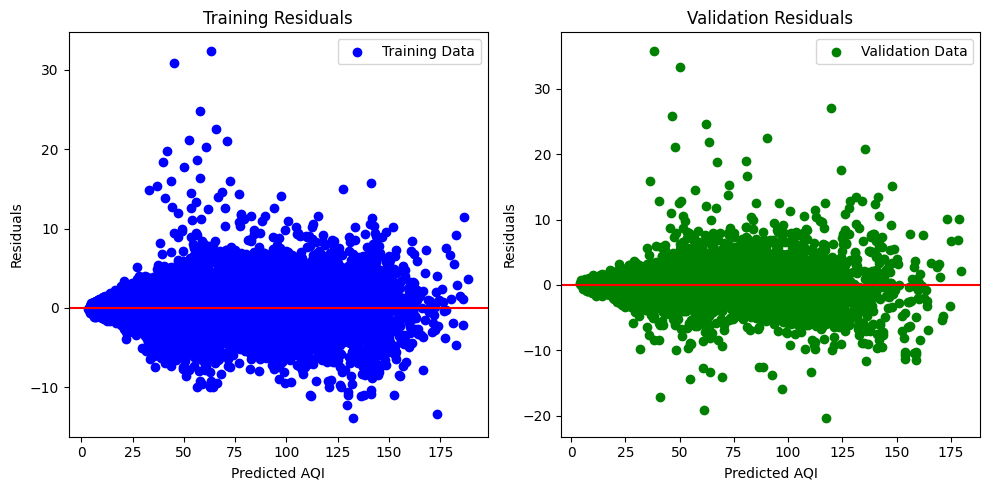

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Load data from CSV files
df_station_hour = pd.read_csv("/content/drive/My Drive/AQI/station_hour.csv")
stations = pd.read_csv("/content/drive/My Drive/AQI/stations.csv")

# Merge station data with AQI data
df_station_hour = df_station_hour.merge(stations[['StationId']], on="StationId")

# Define AQI calculation formulas
# Simplified version for AQI calculation (average of all pollutants)
def calculate_AQI(row):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NOx', 'NH3', 'CO', 'O3']
    sub_indices = [get_subindex(row[poll]) for poll in pollutants]
    return sum(sub_indices) / len(sub_indices)

# Define sub-index calculation function
def get_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return 50 + (x - 50) / 50 * 50
    elif x <= 200:
        return 100 + (x - 100) / 100 * 50
    elif x <= 300:
        return 200 + (x - 200) / 100 * 100
    elif x <= 400:
        return 300 + (x - 300) / 100 * 100
    else:
        return 400 + (x - 400) / 500 * 100

# Apply AQI calculation to station hour data
df_station_hour["AQI_calculated"] = df_station_hour.apply(calculate_AQI, axis=1)

# Drop rows with missing values
df_station_hour.dropna(inplace=True)

# Select features and target
X = df_station_hour[['PM2.5', 'PM10', 'SO2', 'NOx', 'NH3', 'CO', 'O3']]
y = df_station_hour['AQI_calculated']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the XGBoost model
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Training R^2:", train_r2)
print("Validation R^2:", val_r2)

# Save the model
joblib.dump(model, 'xgboost_model.pkl')

# Plot residuals
train_residuals = y_train - y_train_pred
val_residuals = y_val - y_val_pred

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, color='blue', label='Training Data')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.title('Training Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_val_pred, val_residuals, color='green', label='Validation Data')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.title('Validation Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()

plt.tight_layout()
plt.show()


### **SVM**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Load data from CSV files
df_station_hour = pd.read_csv("/content/drive/My Drive/AQI/station_hour.csv", dtype={'StationId': str})
stations = pd.read_csv("/content/drive/My Drive/AQI/stations.csv", dtype={'StationId': str})

# Merge station data with AQI data
df_station_hour = df_station_hour.merge(stations[['StationId']], on="StationId")

# Define AQI calculation formulas
# Simplified version for AQI calculation (average of all pollutants)
def calculate_AQI(row):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NOx', 'NH3', 'CO', 'O3']
    sub_indices = [get_subindex(row[poll]) for poll in pollutants]
    return sum(sub_indices) / len(sub_indices)

# Define sub-index calculation function
def get_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return 50 + (x - 50) / 50 * 50
    elif x <= 200:
        return 100 + (x - 100) / 100 * 50
    elif x <= 300:
        return 200 + (x - 200) / 100 * 100
    elif x <= 400:
        return 300 + (x - 300) / 100 * 100
    else:
        return 400 + (x - 400) / 500 * 100

# Apply AQI calculation to station hour data
df_station_hour["AQI_calculated"] = df_station_hour.apply(calculate_AQI, axis=1)

# Drop rows with missing values
df_station_hour.dropna(inplace=True)

# Select features and target
X = df_station_hour[['PM2.5', 'PM10', 'SO2', 'NOx', 'NH3', 'CO', 'O3']]
y = df_station_hour['AQI_calculated']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf', 'linear', 'poly']}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Define and train the SVM model with the best parameters
model = SVR(**best_params)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Training R^2:", train_r2)
print("Validation R^2:", val_r2)

# Save the model
joblib.dump(model, 'svm_model.pkl')

# Plot residuals
train_residuals = y_train - y_train_pred
val_residuals = y_val - y_val_pred

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, color='blue', label='Training Data')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.title('Training Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_val_pred, val_residuals, color='green', label='Validation Data')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.title('Validation Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-2-c18a1e25e912>:11: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_station_hour = pd.read_csv("/content/drive/My Drive/AQI/station_hour.csv", dtype={'StationId': str})


## **Decission Tree**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Load data from CSV files
df_station_hour = pd.read_csv("/content/drive/My Drive/AQI/station_hour.csv", dtype={'StationId': str})
stations = pd.read_csv("/content/drive/My Drive/AQI/stations.csv", dtype={'StationId': str})

# Merge station data with AQI data
df_station_hour = df_station_hour.merge(stations[['StationId']], on="StationId")

# Define AQI calculation formulas
# Simplified version for AQI calculation (average of all pollutants)
def calculate_AQI(row):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NOx', 'NH3', 'CO', 'O3']
    sub_indices = [get_subindex(row[poll]) for poll in pollutants]
    return sum(sub_indices) / len(sub_indices)

# Define sub-index calculation function
def get_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return 50 + (x - 50) / 50 * 50
    elif x <= 200:
        return 100 + (x - 100) / 100 * 50
    elif x <= 300:
        return 200 + (x - 200) / 100 * 100
    elif x <= 400:
        return 300 + (x - 300) / 100 * 100
    else:
        return 400 + (x - 400) / 500 * 100

# Apply AQI calculation to station hour data
df_station_hour["AQI_calculated"] = df_station_hour.apply(calculate_AQI, axis=1)

# Drop rows with missing values
df_station_hour.dropna(inplace=True)

# Select features and target
X = df_station_hour[['PM2.5', 'PM10', 'SO2', 'NOx', 'NH3', 'CO', 'O3']]
y = df_station_hour['AQI_calculated']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Define and train the decision tree model with the best parameters
model = DecisionTreeRegressor(**best_params)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Training R^2:", train_r2)
print("Validation R^2:", val_r2)

# Save the model
joblib.dump(model, 'decision_tree_model.pkl')

# Plot residuals
train_residuals = y_train - y_train_pred
val_residuals = y_val - y_val_pred

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, color='blue', label='Training Data')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.title('Training Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_val_pred, val_residuals, color='green', label='Validation Data')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.title('Validation Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()

plt.tight_layout()
plt.show()
